### Importación del DataSET

In [1]:
import os
import numpy as np
import tensorflow as tf
import re
import os
import matplotlib.pyplot as plt
import cv2

In [2]:
datapath = r"C:\Users\JUANPABLOGASCA\Desktop\TransferLearning\Base_Datos\P01"
imgpath = datapath + os.sep

images = []
directories = []
dircount = []
prevRoot = ''
cant = 0

print("Leyendo imágenes de", imgpath)

for root, datapath, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant = cant + 1
            filepath = os.path.join(root, filename)
            # Carga la imagen con OpenCV
            image = cv2.imread(filepath)
            # Redimensiona la imagen a 224x224 píxeles
            image = cv2.resize(image, (224, 224))
            images.append(image)
            b = "Leyendo..." + str(cant)
            print(b, end="\r")
            if prevRoot != root:
                print(root, cant)
                prevRoot = root
                directories.append(root)
                dircount.append(cant)
                cant = 0

dircount.append(cant)

dircount = dircount[1:]
dircount[0] = dircount[0] + 1
print('Directorios leídos:', len(directories))
print("Imágenes en cada directorio:", dircount)
print('Suma Total de imágenes en subdirectorios:', sum(dircount))

Leyendo imágenes de C:\Users\JUANPABLOGASCA\Desktop\TransferLearning\Base_Datos\P01\
C:\Users\JUANPABLOGASCA\Desktop\TransferLearning\Base_Datos\P01\CLASE_1 1
C:\Users\JUANPABLOGASCA\Desktop\TransferLearning\Base_Datos\P01\CLASE_2 312
C:\Users\JUANPABLOGASCA\Desktop\TransferLearning\Base_Datos\P01\CLASE_3 312
C:\Users\JUANPABLOGASCA\Desktop\TransferLearning\Base_Datos\P01\CLASE_4 312
C:\Users\JUANPABLOGASCA\Desktop\TransferLearning\Base_Datos\P01\CLASE_5 312
C:\Users\JUANPABLOGASCA\Desktop\TransferLearning\Base_Datos\P01\CLASE_6 312
Directorios leídos: 6
Imágenes en cada directorio: [313, 312, 312, 312, 312, 311]
Suma Total de imágenes en subdirectorios: 1872


In [3]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  1872


In [4]:
posturas=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    posturas.append(name[len(name)-1])
    indice=indice+1

0 CLASE_1
1 CLASE_2
2 CLASE_3
3 CLASE_4
4 CLASE_5
5 CLASE_6


In [5]:
y = np.array(labels)
X = np.array(images) #convierto de lista a numpy

# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  6
Output classes :  [0 1 2 3 4 5]


In [6]:
from sklearn.model_selection import train_test_split

# Test data // for testing at the end after tranning 
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.1)
#print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

# validation data // for testing when tranning 

train_X,val_X,train_Y,val_Y = train_test_split(train_X,train_Y,test_size=0.1)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('validation data shape : ', val_X.shape, val_Y.shape)

Testing data shape :  (188, 224, 224, 3) (188,)
Training data shape :  (1515, 224, 224, 3) (1515,)
validation data shape :  (169, 224, 224, 3) (169,)


In [7]:
img_x = 224
img_y = 224
img_z = 4
num_classes = 6

batch_size = 32
epochs = 100

input_shape = (img_x, img_y, img_z)

# convert the data to the right type
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
val_X = val_X.astype('float32')

print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(val_X.shape[0], 'val samples')
print(test_X.shape[0], 'test samples')


train_X shape: (1515, 224, 224, 3)
1515 train samples
169 val samples
188 test samples


In [8]:
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard

In [9]:
# Crear un objeto TensorBoard - ESTO ES NECESARIO QUE ES PARA VISUALIZAR LAS GRAFICAS DE LOS PACIENTES ENTRE TODOS ASÍ QUE GUARDELO POR CADA PACIENTE
tensorboard_callback = TensorBoard(log_dir=r"C:\Users\JUANPABLOGASCA\Desktop\TransferLearning\Tensorboard\P01")

In [10]:
custom_early_stopping = EarlyStopping(monitor="loss",patience=3) 


### TRANSFER LEARNING

In [ ]:
%pip install tensorflow_hub

In [11]:
import tensorflow_hub as hub

In [12]:
# Modelo CNN ResNet50
path_model = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"
#Efficient NET: https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2

In [13]:

# Modelo CNN ResNet50
path_model = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"

# Definir el modelo 1
model = tf.keras.Sequential([
    hub.KerasLayer(path_model, trainable=False),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])
model.build([None, 224, 224, 3])  # Batch input shape.

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              23564800  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 6)                 12294     
                                                                 
Total params: 23,577,094
Trainable params: 12,294
Non-trainable params: 23,564,800
_________________________________________________________________


In [15]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              metrics=['accuracy'])

model_train = model.fit(train_X,train_Y, batch_size=32, 
          epochs=10, verbose=1, 
          validation_data=(val_X, val_Y),
          callbacks=[tensorboard_callback,custom_early_stopping])

train_score = model.evaluate(train_X, train_Y, verbose=0)
print('Train loss: {}, Train accuracy: {}'.format(train_score[0], train_score[1]))
test_score = model.evaluate(test_X, test_Y, verbose=0)
print('Test loss: {}, Test accuracy: {}'.format(test_score[0], test_score[1]))

Epoch 1/10


c:\Users\JUANPABLOGASCA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


48/48 [==============================] - 107s 2s/step - loss: 28.0727 - accuracy: 0.1980 - val_loss: 16.7420 - val_accuracy: 0.2899
Epoch 2/10
48/48 [==============================] - 98s 2s/step - loss: 11.2912 - accuracy: 0.3155 - val_loss: 16.5662 - val_accuracy: 0.2840
Epoch 3/10
48/48 [==============================] - 117s 2s/step - loss: 12.2693 - accuracy: 0.3663 - val_loss: 22.9069 - val_accuracy: 0.3018
Epoch 4/10
48/48 [==============================] - 115s 2s/step - loss: 8.7157 - accuracy: 0.3749 - val_loss: 11.4001 - val_accuracy: 0.3432
Epoch 5/10
48/48 [==============================] - 104s 2s/step - loss: 8.5557 - accuracy: 0.4191 - val_loss: 6.3352 - val_accuracy: 0.3846
Epoch 6/10
48/48 [==============================] - 103s 2s/step - loss: 11.5562 - accuracy: 0.4112 - val_loss: 6.1015 - val_accuracy: 0.4142
Epoch 7/10
48/48 [==============================] - 102s 2s/step - loss: 7.4712 - accuracy: 0.4541 - val_loss: 4.2543 - val_accuracy: 0.4734
Epoch 8/10
48/48 

### VALIDATION

In [16]:
from matplotlib import pyplot as plt
def visualizacion_resultados(model):
  
    fig, ax = plt.subplots(1,2)
    acc = model.history['accuracy']
    loss = model.history['loss']
    val_acc = model.history['val_accuracy']
    val_loss = model.history['val_loss']
    epochs  = range(len(acc))
    fig.set_size_inches(16,9)

    ax[0].plot(epochs,acc,'ko-',label = 'Train Accuracy')
    ax[0].plot(epochs,val_acc,'bo-',label = 'Validation Acurracy')
    ax[0].set_title('Training & Validation Accuracy')
    ax[0].legend()
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    #plt.savefig(r"C:\Users\JUANPABLOGASCA\Desktop\Pacientes_CNN\Validation\P06_S1_32_ACC.png",bbox_inches = 'tight')


    ax[1].plot(epochs,loss,'ko-',label = 'Train Loss')
    ax[1].plot(epochs,val_loss,'bo-',label = 'Validation Loss')
    ax[1].set_title('Training & Validation Loss')
    ax[1].legend()
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    plt.savefig(r"C:\Users\JUANPABLOGASCA\Desktop\TransferLearning\Validación\P01.png",bbox_inches = 'tight')
    plt.show()


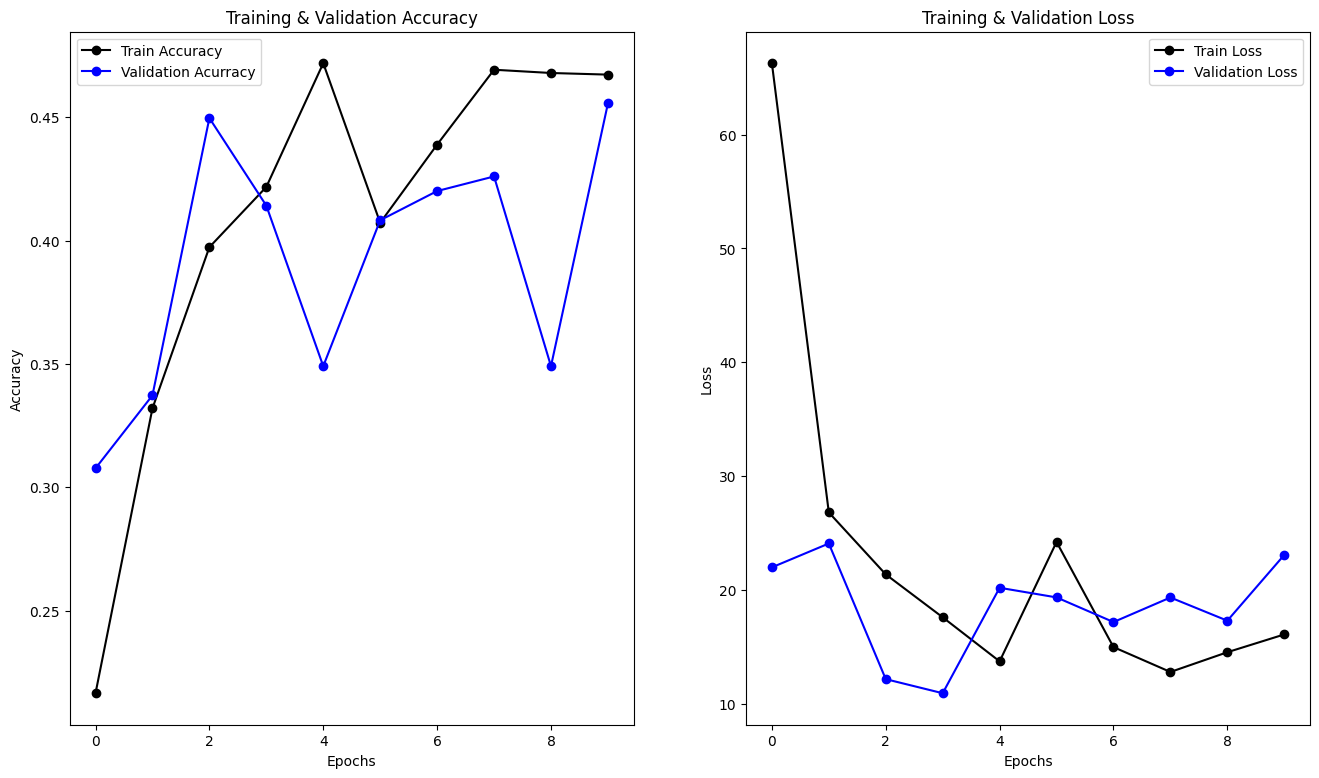

In [17]:
visualizacion_resultados(model_train)

### SAVE H5

In [17]:
if os.path.isfile(r"C:\Users\JUANPABLOGASCA\Desktop\ALL-BY-ONE\H5\\32_CNN.h5") is False:
    model.save(r"C:\Users\JUANPABLOGASCA\Desktop\ALL-BY-ONE\H5\\32_CNN.h5")

### CNN ARQUITECTURE

In [18]:
import visualkeras
from PIL import ImageFont
from tensorflow.keras import layers
from collections import defaultdict
from PIL import Image

# Definir la fuente
font = ImageFont.truetype("arial.ttf", 15)

color_map = defaultdict(dict)
color_map[layers.Conv2D]['fill'] = '#00f5d4'
color_map[layers.MaxPooling2D]['fill'] = '#8338ec'
color_map[layers.Dense]['fill'] = '#fb5607'
color_map[layers.Flatten]['fill'] = '#ffbe0b'

img = visualkeras.layered_view(model, legend=True, font=font,color_map=color_map)
#img.save(r"C:\Users\JUANPABLOGASCA\Desktop\Pacientes_CNN\Arquitectura - CNN\CNN_3.png", "PNG")


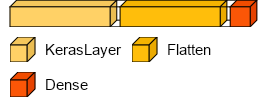

In [19]:
img

## GENERAR PREDICCIONES

In [245]:
new_model = tf.keras.models.load_model(r"C:\Users\JUANPABLOGASCA\Desktop\ALL-BY-ONE\H5\\32_CNN.h5")

In [262]:
new_model.evaluate(test_X,test_Y)

36/36 [==============================] - 0s 3ms/step - loss: 0.9130 - accuracy: 0.6699


[0.9130258560180664, 0.6699288487434387]

In [247]:
predicted_classes2 = new_model.predict(test_X)

71/71 [==============================] - 0s 3ms/step


In [248]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [249]:
predicted_classes.shape, test_Y.shape

((2247,), (2247,))

In [250]:
#rounded_labels = np.argmax(test_Y, axis=1)
rounded_labels = test_Y
rounded_labels[5]

3

### CONFUSION MATRIX

71/71 [==============================] - 0s 3ms/step
Confusion Matrix
[[169  29  24  56  71   0]
 [ 20 265  38  46  35   0]
 [ 31  70 208  44  30   1]
 [ 30  17  14 235  91   1]
 [ 14  12   8  47 294   3]
 [  1   1   2   0   0 340]]


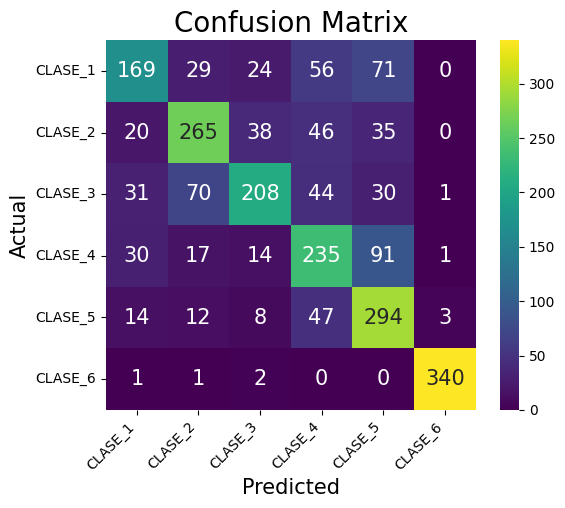

In [254]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sn

#convert tests labels in single-digits instead of one-hot encoding
y_test_arg = np.array(test_Y, dtype=int)

Y_pred = np.argmax(new_model.predict(test_X),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))

#Normalizado
#np.round(cm/np.sum(cm,axis =1).reshape(-1,1),2)

#Confusion matrix
cm = confusion_matrix(y_test_arg, Y_pred)

labels=["CLASE_1","CLASE_2","CLASE_3","CLASE_4","CLASE_5","CLASE_6"] 
#cm = np.round(cm/np.sum(cm,axis =1).reshape(-1,1),1)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
ax = plt.axes()
ax = sn.heatmap(df_cm, annot=True, annot_kws={"size": 15}, square=True, cbar=True, cmap="viridis", fmt='g')
ax.set_title('Confusion Matrix', fontsize =20)
ax.set_ylim(0, 6) #this manually corrects the cutoff issue in sns.heatmap found in matplotlib ver 3.1.1
plt.xlabel("Predicted",fontsize =15) 
plt.ylabel("Actual",fontsize =15) 
ax.invert_yaxis() #optional
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticklabels(labels, rotation=0, ha='right')
plt.savefig(r"C:\Users\JUANPABLOGASCA\Desktop\ALL-BY-ONE\Matriz Confusión\Regular\All_by_One_P10_32.png", bbox_inches = 'tight')
plt.show()

### CONFUSION MATRIX

71/71 [==============================] - 0s 3ms/step
Confusion Matrix
[[169  29  24  56  71   0]
 [ 20 265  38  46  35   0]
 [ 31  70 208  44  30   1]
 [ 30  17  14 235  91   1]
 [ 14  12   8  47 294   3]
 [  1   1   2   0   0 340]]


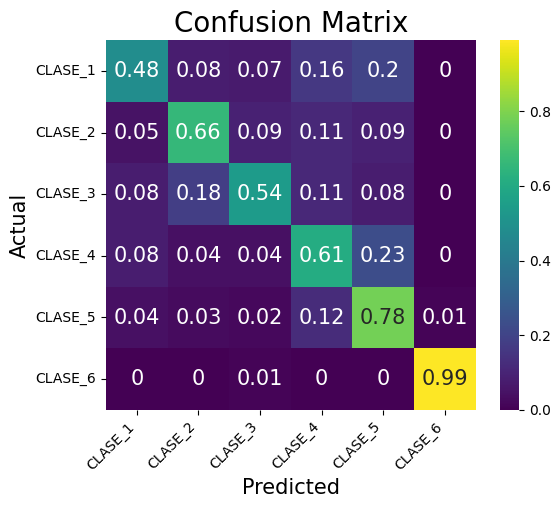

In [255]:
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

#convert tests labels in single-digits instead of one-hot encoding
y_test_arg = np.array(test_Y, dtype=int)
Y_pred = np.argmax(new_model.predict(test_X),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))

#Normalizado
#np.round(cm/np.sum(cm,axis =1).reshape(-1,1),2)

#Confusion matrix
cm = confusion_matrix(y_test_arg, Y_pred)

labels=["CLASE_1","CLASE_2","CLASE_3","CLASE_4","CLASE_5","CLASE_6"] 
cm = np.round(cm/np.sum(cm,axis =1).reshape(-1,1),2)
df_cm = pd.DataFrame(cm, labels, labels)
ax = plt.axes()
ax = sn.heatmap(df_cm, annot=True, annot_kws={"size": 15}, square=True, cbar=True, cmap="viridis", fmt='g')
ax.set_title('Confusion Matrix', fontsize =20)
ax.set_ylim(0, 6) #this manually corrects the cutoff issue in sns.heatmap found in matplotlib ver 3.1.1
plt.xlabel("Predicted",fontsize =15) 
plt.ylabel("Actual",fontsize =15) 
ax.invert_yaxis() #optional
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticklabels(labels, rotation=0, ha='right')
plt.savefig(r"C:\Users\JUANPABLOGASCA\Desktop\ALL-BY-ONE\Matriz Confusión\Normalizada\All_by_One_P10_32.png", bbox_inches = 'tight')
plt.show()

### METRICS 

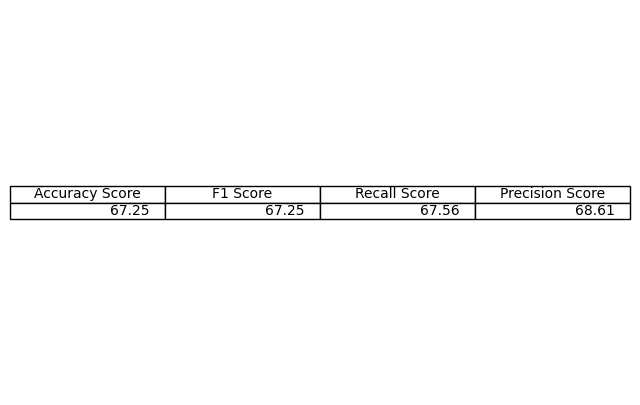

In [256]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test_arg, Y_pred)
f1 = f1_score(y_test_arg, Y_pred, average='weighted')
recall = recall_score(y_test_arg, Y_pred, average='macro')
precision = precision_score(y_test_arg, Y_pred, average='macro')

metrics_dict = {'Accuracy Score': [round(accuracy*100,2)], 'F1 Score': [round(accuracy*100,2)], 'Recall Score': [round(recall*100,2)], 'Precision Score': [round(precision*100,2)]}
df_metrics = pd.DataFrame.from_dict(metrics_dict)

# guardar dataframe como png
fig, ax = plt.subplots(figsize=(8,5))
ax.axis('off')
ax.axis('tight')
ax.table(cellText=df_metrics.values,colLabels=df_metrics.columns,loc='center')
plt.savefig(r"C:\Users\JUANPABLOGASCA\Desktop\ALL-BY-ONE\Metricas_General\All_by_one_P10_32.png")


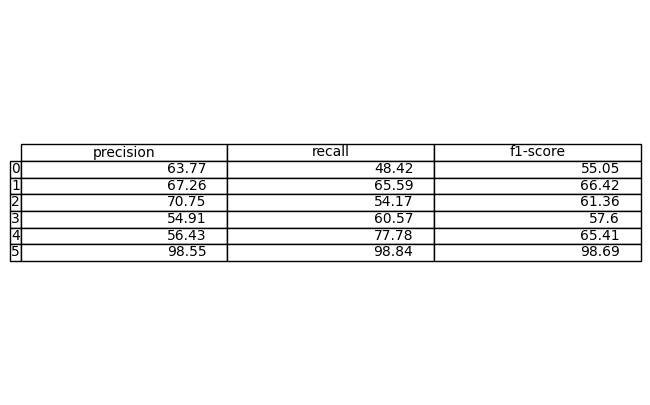

In [257]:
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Obtener el reporte de clasificación
report = metrics.classification_report(y_test_arg,Y_pred, digits = 4, output_dict=True)
df = pd.DataFrame(report).transpose()

# Eliminar la última fila ('accuracy') ya que no es necesaria
#df = df.iloc[:-1,:]
class_metrics = df.loc[['0', '1', '2', '3', '4', '5'], ['precision', 'recall', 'f1-score']]

# Guardar la tabla como PNG
fig, ax = plt.subplots(figsize=(8,5))
ax.axis('off')
ax.axis('tight')
ax.table(cellText=np.round(class_metrics.values*100,2),colLabels=class_metrics.columns,rowLabels=class_metrics.index,loc='center')
plt.savefig(r"C:\Users\JUANPABLOGASCA\Desktop\ALL-BY-ONE\Metricas_Class\All_by_one_P10_32.png")

